EDA.

Download the data and convert the list of edges to graph. Check the number of nodes, of connected components. 
The instructions for drawing the graph are commented out to make economy of execution time. Their result is included on the folder res/.

Check that all nodes in train and test sets are distinct and indeed in the graph. 

In [21]:
import pandas as pd
import networkx as nx
import numpy as np

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

# Задание - Предсказание уровня экспресси белка

<div class="alert alert-info">
<b>Про биологию</b>
    
Экспрессия — процесс, в ходе которого наследственная информация от гена (последовательности нуклеотидов ДНК) преобразуется в функциональный продукт — белок. Уровнем экспрессии называют - количество белка, производящегося в этом процессе. Чем выше экспрессия белка, тем большее количество этого белка появляется в клетках человека. 
    
    

<div class="alert alert-info">    
<b>Важность задачи</b>
    
Существует множество причин необходимости в знании уровня экспресии белка. Например - это позволяет ученым разрабатывать лекарственные средства и оптимизировать их разработку. Теперь вам предстоит побыть в роли биоинформатика и помочь науке!
    
</div>


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой граф взаимойдествия белков. Где узлы это белки, взаимодействие между белками это ребро. 

Для каждого белка известен уровень его экспрессии. Ниже приведен список ребер `edges`. Информация по экспрессии белков, разбитая на `train` и `test`.
   
    
</div>

In [22]:
#Список ребер графа 

# edges = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Otus_HW_protein_expression/main/edges.csv", sep=",") # Подгрузим данные
edges = pd.read_csv("../dat/edges.csv", sep=",")
print((edges.shape))  # (594174, 3)
edges.head()

(594174, 3)


,Unnamed: 0,node_1,node_2
0,0,344,50
1,1,344,153
2,2,344,532
3,3,344,679
4,4,344,986


In [23]:
edges.dtypes
# int64

Unnamed: 0    int64
node_1        int64
node_2        int64
dtype: object

Convert to an undirected graph.

In [24]:
# see: https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html

G = nx.from_pandas_edgelist(edges, "node_1", "node_2")
print(type(G))
print("The graph contains", G.number_of_nodes(), "nodes (proteins).")  # 10000
print("and", G.number_of_edges(), "edges.")  # 594174, OK
print("It has", nx.number_connected_components(G) , "connected component(s).")  # 1

<class 'networkx.classes.graph.Graph'>
The graph contains 10000 nodes (proteins).
and 594174 edges.
It has 1 connected component(s).


In [25]:
# Array of all labels, max
arr_G_nodes = np.array(G.nodes())

print(np.max(arr_G_nodes)) # 31204

31204


Подгрузим и проверим тренирочную выборку.

In [26]:
# Подгрузим данные
train = pd.read_csv("../dat/train.csv", sep=",")

print(train.shape)  # (8000, 3)
train.head()

(8000, 3)


,Unnamed: 0,target,node
0,0,0.251968,11142
1,1,0.689541,2243
2,2,0.678245,15514
3,3,0.272500,20944
4,4,0.248888,8721


In [27]:
# The data types are float64 , int64
train.dtypes

Unnamed: 0      int64
target        float64
node            int64
dtype: object

In [28]:
# They do not contain empty rows 
train.isnull().sum()

# 0 , 0 : OK

Unnamed: 0    0
target        0
node          0
dtype: int64

In [29]:
# The nodes in training set are distinct and contained in the graph.
train_nodes = train['node']
print(train_nodes.shape)  # (8000,)
print(np.max(train_nodes))  # 31204, equal to the max label of nodes in the graph.

_, unique_counts_train = np.unique(train_nodes, return_counts=True)
print(np.max(unique_counts_train))  # 1, OK

print("Are the train nodes in the graph?", set(train_nodes).issubset(set(arr_G_nodes)))
# True!


(8000,)
31204
1
Are the train nodes in the graph? True


Подгрузим и проверим отложенную выборку для валидации

In [30]:
# test = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Otus_HW_protein_expression/main/test.csv", sep=",")
test = pd.read_csv("../dat/test.csv", sep=",")
print(test.shape)  # (2000, 3)
test.head()  # nodes: 817, 9574, 1607, 4782, 24125

(2000, 3)


,Unnamed: 0,target,node
0,0,0.279231,817
1,1,0.380795,9574
2,2,0.686527,1607
3,3,0.303594,4782
4,4,0.367374,24125


In [31]:
# The data types are float64 , int64
# test.dtypes

In [32]:
# They do not contain empty rows 
test.isnull().sum()

Unnamed: 0    0
target        0
node          0
dtype: int64

In [33]:
# The nodes in test set are distinct and contained in the graph.
test_nodes = test['node']
print(test_nodes.shape)  # (2000,)
print(np.max(test_nodes))  # 31120, smaller than the max label of nodes in the graph.

_, unique_counts_test = np.unique(test_nodes, return_counts=True)
print(np.max(unique_counts_test))  # 1, OK

print("Are the train nodes in the graph?", set(test_nodes).issubset(set(arr_G_nodes)))
# True!

(2000,)
31120
1
Are the train nodes in the graph? True


In [34]:
# The train and test sets are indeed disjoint.
print("Are the train and test sets disjoint?", set(test_nodes).isdisjoint(set(train_nodes)))
# True

Are the train and test sets disjoint? True


# Distribution of the target variable.

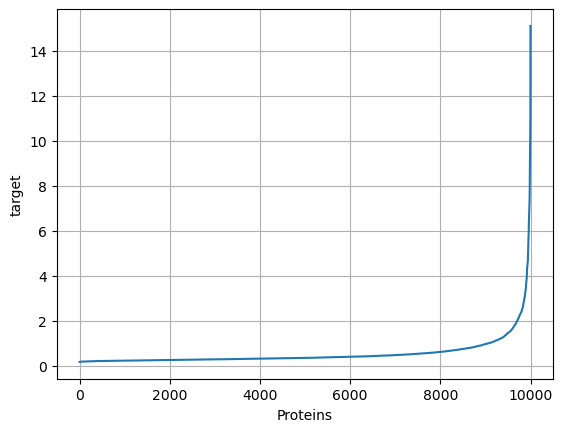

In [35]:
plt.plot(sorted(pd.concat([train, test], axis=0)['target']))
plt.grid(True)
plt.xlabel('Proteins')
plt.ylabel('target')
plt.show()

# The graph shows that all gene expressions are positive numbers. A small number of genes show high expression, producing a high peak.

Quality of the dummy prediction (by the mean of train set).

In [36]:
mean_train = np.mean(train['target'])
print('The mean of the target variable over the training set is:', mean_train)
# 0.53

dummy_predict = mean_train*np.ones(test.shape[0])
dummy_error = mean_squared_error(test['target'], dummy_predict)

print('The MSE of the dummy prediction is:', dummy_error)
# 0.75

# The result is dominated by small values (between 0 and 1), which are quite numerous. 
# The dummy prediction has RMSE higher than the prediction itself. 

The mean of the target variable over the training set is: 0.5310214939723135
The MSE of the dummy prediction is: 0.7535519418707666


# Draw the graph.

This operation can be commented out for it takes some time. Its possible result is saved as: results/graph_train_test_sets.png .
The result shows that the train and test sets seem well distributed over the whole graph. 

1. Define colors

In [37]:

CODE_BLUE = np.array([[0., 0., 1.]])
CODE_YELLOW = np.array([[1., 1., 0.]])

def node_in_test(in_node):
    return np.isin(in_node, test_nodes)

# Example.
print(node_in_test(9574))  # True
print(node_in_test(15514)) # element of train set, returns False

def node_to_col(in_node):
    return CODE_YELLOW if node_in_test(in_node) else CODE_BLUE

# append the info to the graph
# dict_clrs = {nde:node_to_col(nde) for nde in G_nodes}
dict_clrs = {nde:node_to_col(nde) for nde in G.nodes}

print(type(dict_clrs))  # dict
print(dict_clrs[9574])  # yellow
print(dict_clrs[15514]) # blue


True
False


<class 'dict'>
[[1. 1. 0.]]
[[0. 0. 1.]]


2. Draw the graph (can be converted to a function of G, or it may already exist).

In [38]:
mat_clrs = np.vstack([ dict_clrs[n] for n in G.nodes()])

print(mat_clrs.shape)  # should be (10000, 3)

"""
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]    
"""
print(mat_clrs[0:5,:])

(10000, 3)
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


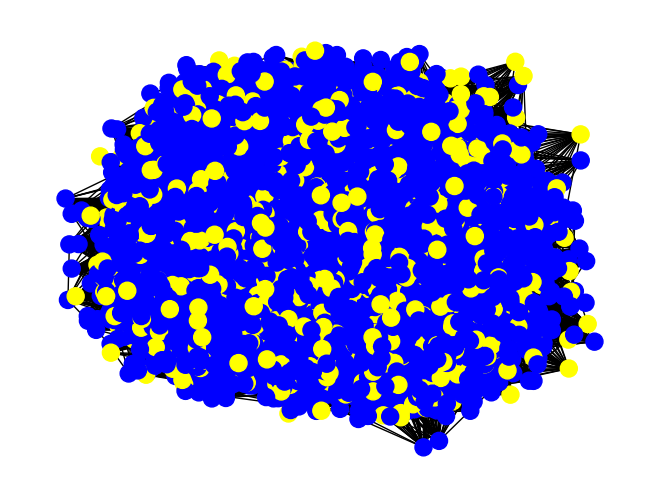

In [39]:
nx.draw_spring(G, node_color=mat_clrs, node_size=150)

<div class="alert alert-info">
<b>Про Задачу</b>
    
Вам предлагается предсказать экспрессию белков (`target`) по приведенным данным для отложенной выборки. Ответы в отложенной выборке `test` даны вам для самостоятельной валидации.


    
   
    

<div class="alert alert-info">
<b>Замечание и комментарии</b>
    
    

По ряду причин датасет был упрощен так, чтобы выполнялись следующие условия:
* у графа одна компонента связанности. 
* удалены слишком крупные хабы
* плотность связей графа уменьшена
* решить задачу можно классическими ML подходами
    
   

<div class="alert alert-info">
<b>Оценка результатов</b>
    


Оценка точности модели будет оцениваться по метрике MSE на отложенной выборке `test`
        
</div>

<div class="alert alert-info">
<b>Автор задачи</b>

По всем дополнительным вопросами писать Александру Миленькину
* Телеграмм: Alerin75infskin
* Почта: milenkin.aa@phystech.edu
        
</div>

Conclusion of 1st (preliminary) EDA.
The 10000 nodes are subdivided in a train and test sets with proportion 0.8/0.2 . 
Test set seems distributed relatively uniformly among the nodes of the graph.

The dummy prediction does not take the proteins with high expressivity into account. It produces error higher than the prediction.